In [1]:
import os;import sys; sys.path.append('../../DataPreparation')
from cleaner import read_data
from helpers import convey_insights,display_with_scroll
sys.path.append("../../")
from utils import save_model,save_hyperparameters,load_hyperparameters,nice_table
from ModelPipelines.ModelAnalysis import evaluate, learning_curves,cross_validation,log_weights_analysis
from mlpath import mlquest as mlq
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn.feature_selection import RFE

In [2]:
model_name= 'GradientBoost'
model_adjusted_name= model_name
mlq.start_quest(model_name, table_dest="../../", log_defs=True)

# <font color="aqua">GradientBoost </font> Model

###  Read the Data

In [3]:
x_data, y_data,_,_ = mlq.l(read_data)(split="train", nulls="mix",outliers="cap", standardize="standardize",encode='Binary',pca=0.9,skip=['RetentionCalls','RetentionOffersAccepted'], oversample='None')

### Default values of HyperParameters

In [4]:
nice_table(GradientBoostingClassifier().get_params())

ccp_alpha,criterion,init,learning_rate,loss,max_depth,max_features,max_leaf_nodes,min_impurity_decrease,min_samples_leaf,min_samples_split,min_weight_fraction_leaf,n_estimators,n_iter_no_change,random_state,subsample,tol,validation_fraction,verbose,warm_start
0.0,friedman_mse,None,0.1,log_loss,3,None,None,0.0,1,2,0.0,100,None,None,1.0,0.0001,0.1,0,False


### Search Best Hyper Parameters

In [5]:
if os.path.exists(f"../../Saved/{model_adjusted_name}_opt_params.pkl") :
    opt_params=load_hyperparameters(model_adjusted_name)
    
else:
    model=mlq.l(GradientBoostingClassifier)()
    params = {
        "n_estimators": [100, 200],  # Number of boosting stages
        "learning_rate": [0.01,0.05, 0.1, 0.2, 0.3],  # Shrinks contribution of each tree
        "max_depth": [3, 4, 5, 6],  # Maximum depth of the individual regression estimators
        "min_samples_split": [2, 5, 10],  # Minimum number of samples required to split an internal node
        "min_samples_leaf": [1, 2, 4],  # Minimum number of samples required to be at a leaf node
        "subsample": [0.6, 0.8, 1.0],  # Fraction of samples to use for training each base learner
        "max_features": ['auto', 'sqrt', 'log2'],  # Number of features to consider for the best split
    }
    model = RandomizedSearchCV(model, params, n_iter=10, cv=5, verbose=3, n_jobs=-1,scoring="f1")
    model.fit(x_data, y_data)

    opt_params = model.best_params_
    save_hyperparameters(model_adjusted_name, opt_params)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be remov

In [6]:
nice_table(opt_params)

subsample,n_estimators,min_samples_split,min_samples_leaf,max_features,max_depth,learning_rate
0.8,100,5,2,auto,6,0.2


### Train Model

In [7]:
model = mlq.l(GradientBoostingClassifier)(**opt_params)
model.fit(x_data,y_data)

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be remov

GradientBoostingClassifier(learning_rate=0.2, max_depth=6, max_features='auto',
                           min_samples_leaf=2, min_samples_split=5,
                           subsample=0.8)

### Evaluate Model

In [8]:
y_pred=model.predict(x_data)
metrics=evaluate(y_pred=y_pred, y_true=y_data,title="Train Evaluation Metrics", table=True)

Accuracy,Precision,Recall,F1 Score,ROC AUC
0.81793,0.89885,0.41228,0.56528,0.6968


### Model Generalization

In [9]:
scores=cross_validation(model,x_data,y_data)
convey_insights([])

Accuracy_train,Precision_train,Recall_train,F1 Score_train,ROC AUC_train
0.83484,0.92103,0.46461,0.61761,0.91105


Accuracy_test,Precision_test,Recall_test,F1 Score_test,ROC AUC_test
0.71053,0.48944,0.18968,0.27334,0.6592


<h3><font color="pink" size=5>Insights</font></h3> <font size=4>
</font>

### Model Learning Curve

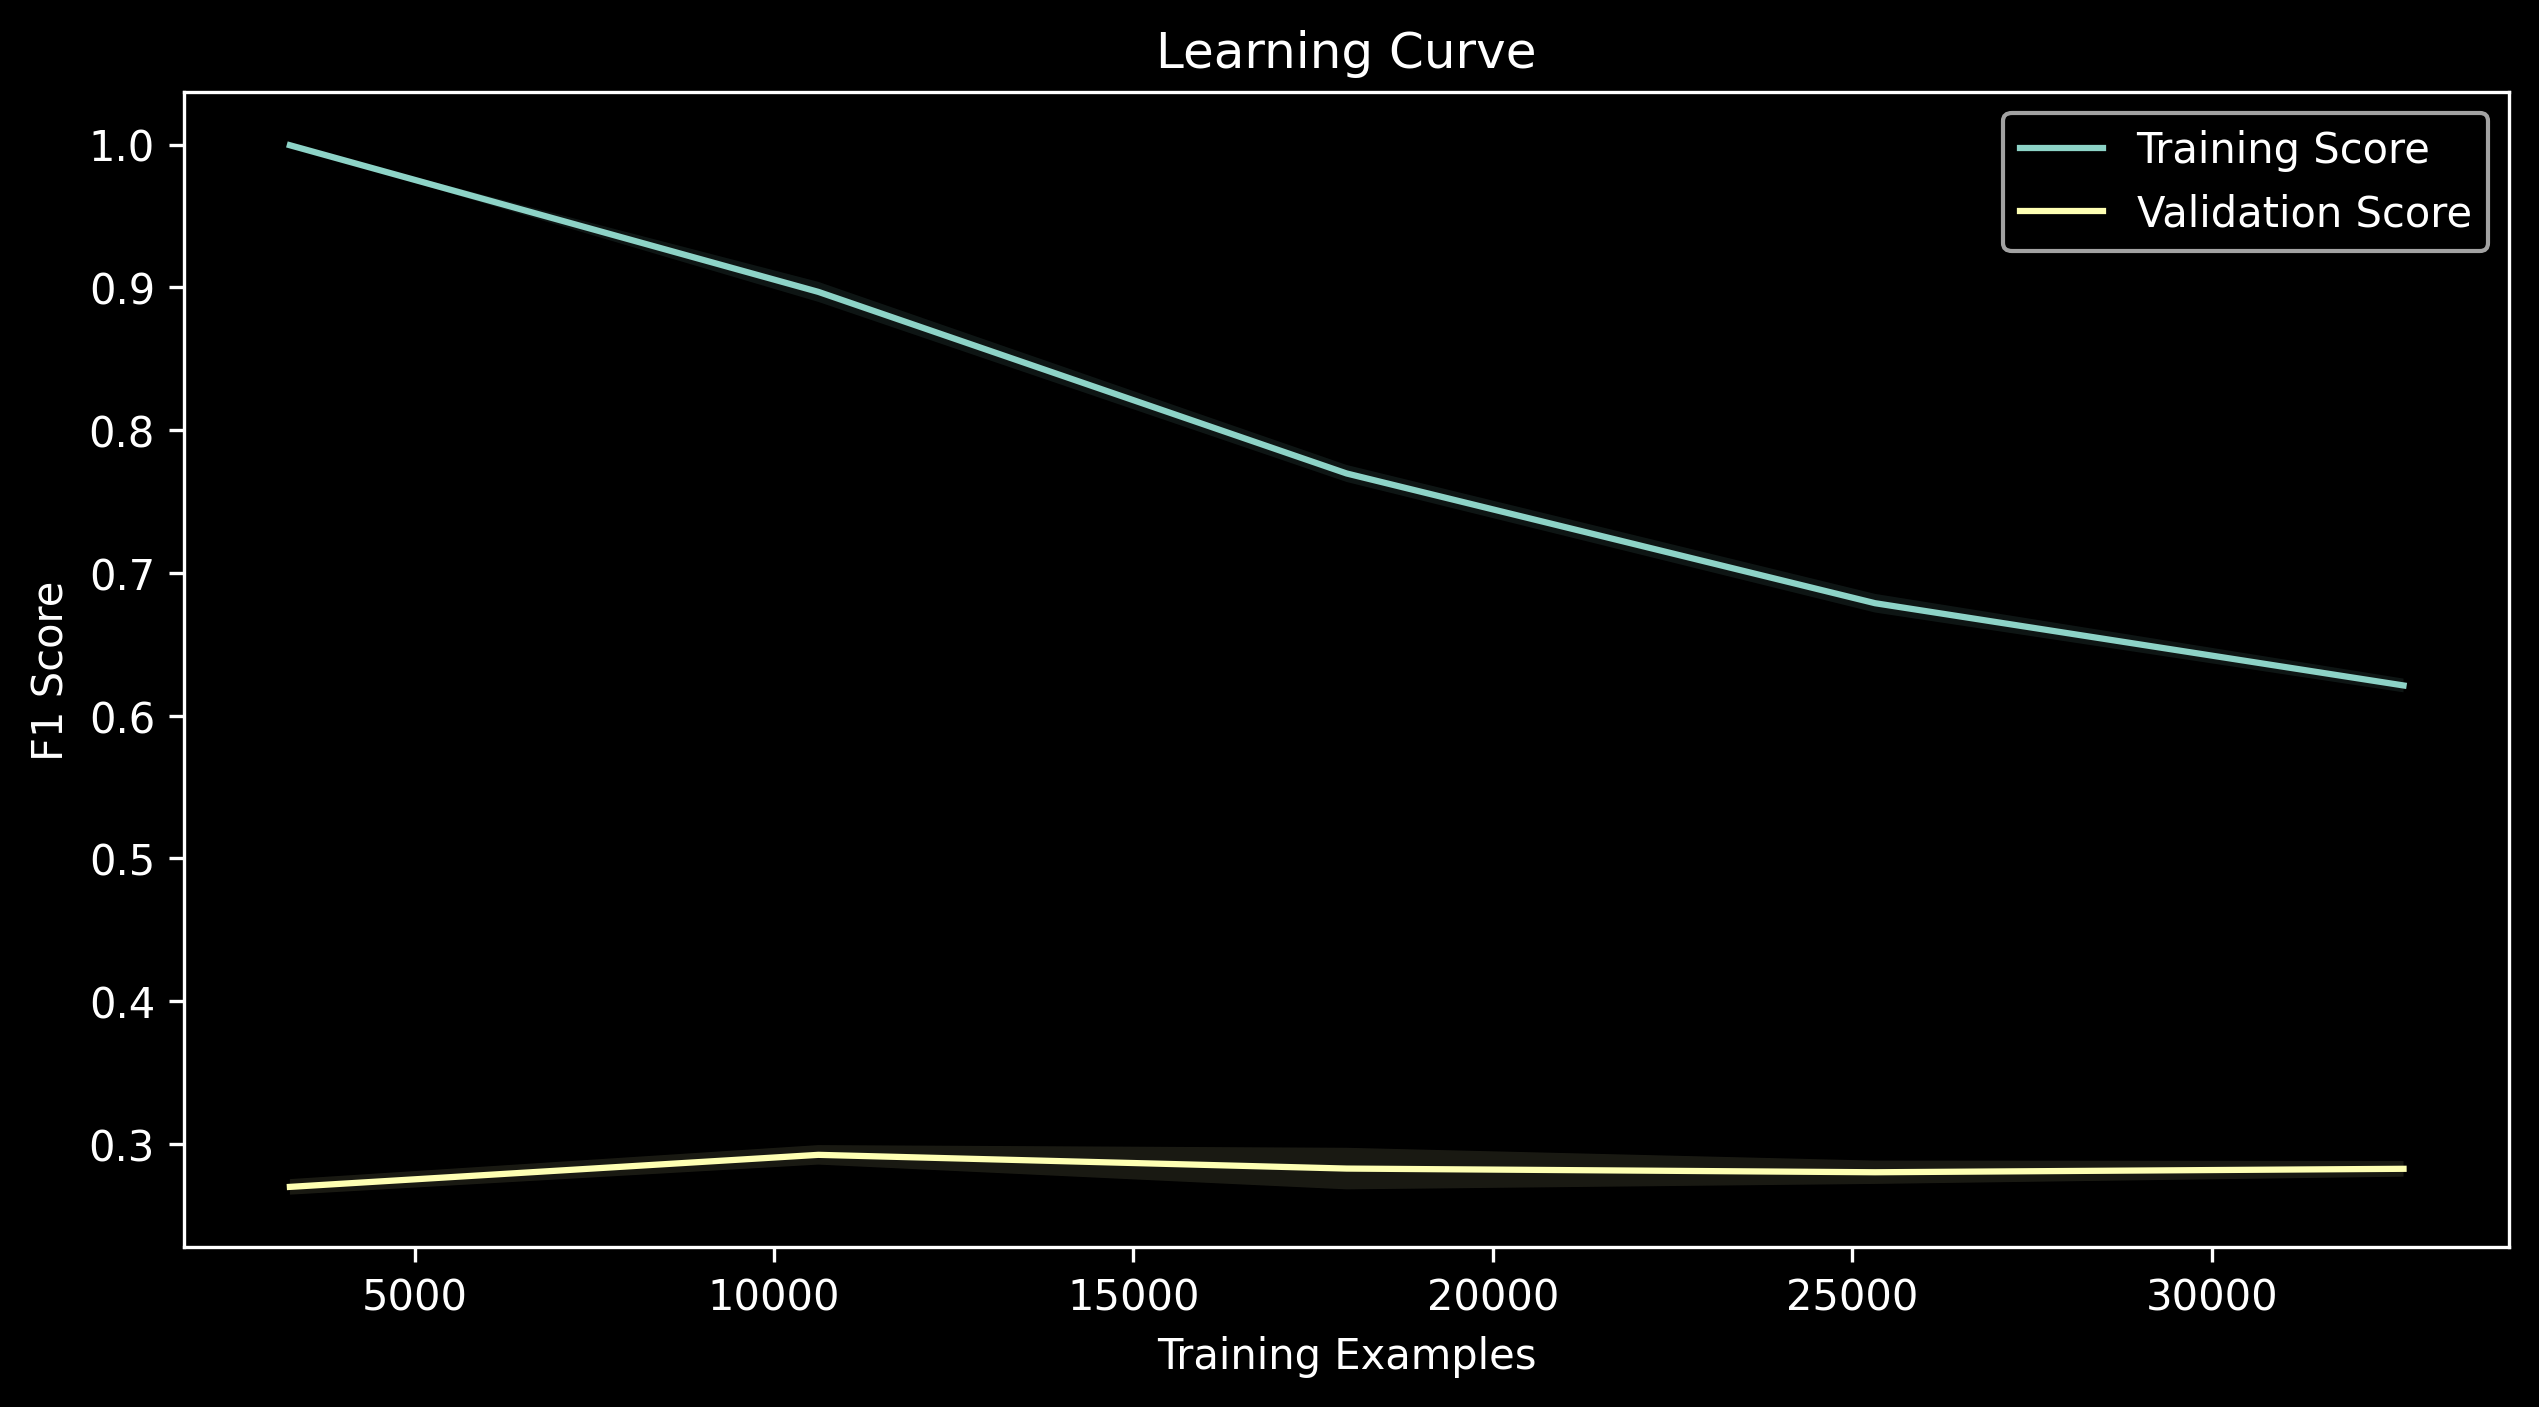

In [10]:
train_sizes = np.linspace(0.1, 1.0, 5)
learning_curves(model, x_data, y_data,N=train_sizes)

### Feature Selection

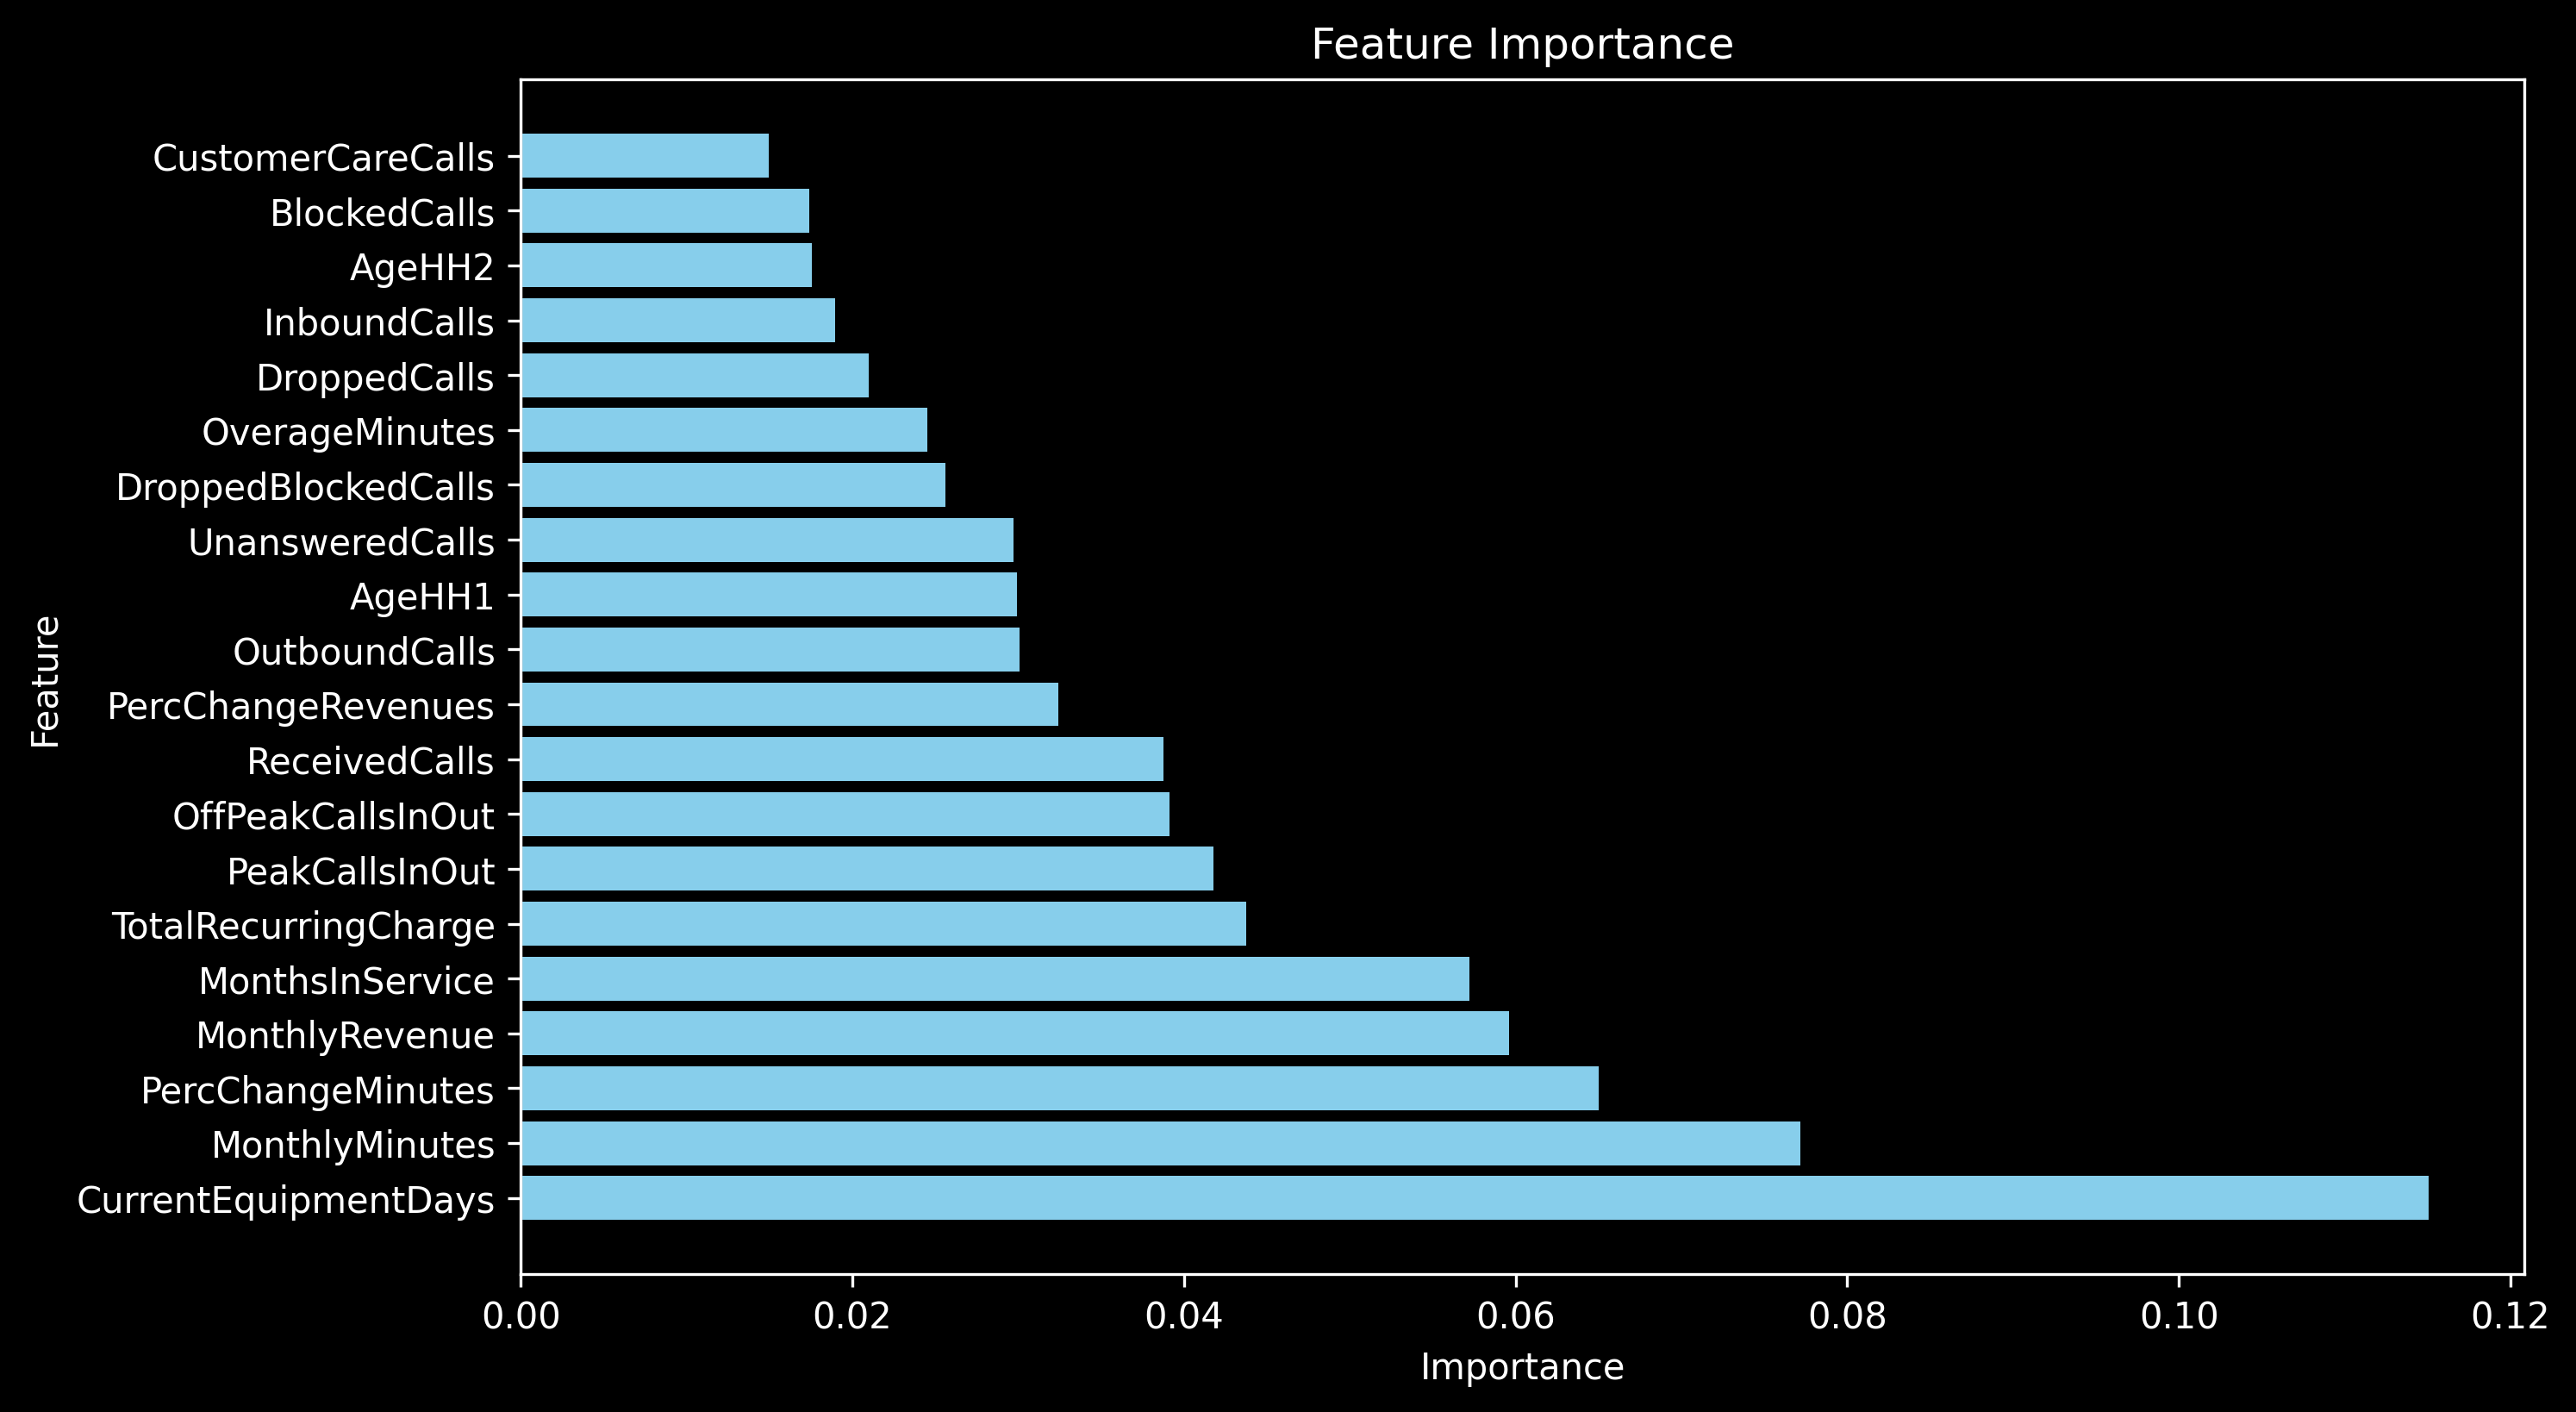

In [11]:
log_weights_analysis(model,x_data)

### Save Model

In [12]:
save_model(model_adjusted_name, model)

### Tracking

In [13]:
mlq.log_metrics(**scores)
mlq.end_quest()
mlq.show_logs(model_name, table_dest="../../", last_k=10)

In [14]:
convey_insights([
    "Gradient Boost is only overfitting and is unable to generalize on the validation set",
    "we can see that from Learning Curves: As the training size increases, better performance is observed. However, the validation score is not improving",
    "We can also see that the features have extremely low importance",
])

<h3><font color="pink" size=5>Insights</font></h3> <font size=4>
<font color="pink">✦</font> Gradient Boost is only overfitting and is unable to generalize on the validation set<br><br><font color="pink">✦</font> we can see that from Learning Curves: As the training size increases, better performance is observed. However, the validation score is not improving<br><br><font color="pink">✦</font> We can also see that the features have extremely low importance<br><br></font>

### Oversampling

In [17]:
# with oversampling

mlq.start_quest(model_name, table_dest="../../", log_defs=True)

x_train,x_val,y_train,y_val=mlq.l(read_data)(split="val", nulls="mix",outliers="cap", standardize="standardize",encode='Binary',pca=0.9,skip=['RetentionCalls','RetentionOffersAccepted'], oversample='random_oversampling')

model = mlq.l(GradientBoostingClassifier)(**opt_params)
model.fit(x_train,y_train)

y_pred_train=model.predict(x_train)
y_pred_val=model.predict(x_val)

train_scores=evaluate(y_pred=y_pred_train, y_true=y_train,title="Train Evaluation Metrics", table=False)
val_scores=evaluate(y_pred=y_pred_val, y_true=y_val,title="Val Evaluation Metrics", table=False)

display(nice_table(train_scores,"Train Evaluation Metrics"))
display(nice_table(val_scores,"Val Evaluation Metrics"))
train_scores = {f"{key}_train": value for key, value in train_scores.items()}
val_scores = {f"{key}_test": value for key, value in val_scores.items()}


scores={**train_scores,**val_scores}
mlq.log_metrics(**scores)
mlq.end_quest()

Accuracy,Precision,Recall,F1 Score,ROC AUC
0.84941,0.83449,0.87172,0.8527,0.84941


Accuracy,Precision,Recall,F1 Score,ROC AUC
0.65328,0.4036,0.46419,0.43178,0.5962


In [18]:
mlq.show_logs(model_name, table_dest="../../", last_k=10)